In [1]:
import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
from scipy.stats import linregress

from pathlib import Path

In [2]:
CA_diabetes_race_path = Path(r"C:\Users\bigbo\Downloads\adults-with-diabetes-per-100-lghc-indicator-23.csv")
CA_diabetes_race_data = pd.read_csv(CA_diabetes_race_path)

In [3]:
CA_diabetes_race_data.columns

Index(['Geography', 'Year', 'Strata', 'Strata Name', 'Percent', 'Lower 95% CL',
       'Upper 95% CL', 'Standard Error'],
      dtype='object')

In [15]:
renamed_df = CA_diabetes_race_data.rename(columns = {"Strata Name": "Race"})
renamed_df

,Geography,Year,Strata,Race,Percent,Lower 95% CL,Upper 95% CL,Standard Error
0,California,2018,Total population,Total population,10.4,8.9,11.9,0.8
1,California,2018,Race-Ethnicity,White,8.4,6.9,9.9,0.8
2,California,2018,Race-Ethnicity,African-American,12.3,6.0,18.6,3.2
3,California,2018,Race-Ethnicity,Asian,8.5,3.2,13.9,2.7
4,California,2018,Race-Ethnicity,Hispanic,12.1,9.0,15.1,1.6
...,...,...,...,...,...,...,...,...
142,California,2012,Income,"$25,000 to $34,999",11.9,9.8,14.1,1.1
143,California,2012,Income,"$35,000 to $49,999",9.5,7.9,11.0,0.8
144,California,2012,Income,"$50,000 and above",6.3,5.6,7.0,0.4
145,California,2012,Sex,Male,9.7,8.9,10.5,0.4


In [17]:
reduced_df = renamed_df[["Year", "Race", "Percent"]]
reduced_df

,Year,Race,Percent
0,2018,Total population,10.4
1,2018,White,8.4
2,2018,African-American,12.3
3,2018,Asian,8.5
4,2018,Hispanic,12.1
...,...,...,...
142,2012,"$25,000 to $34,999",11.9
143,2012,"$35,000 to $49,999",9.5
144,2012,"$50,000 and above",6.3
145,2012,Male,9.7


In [18]:
Race_DF = reduced_df.loc[(reduced_df["Race"] == 'Asian')|(reduced_df["Race"] == 'White')|(reduced_df["Race"] == 'African-American')|(reduced_df["Race"] == 'Hispanic')]
Race_DF

,Year,Race,Percent
1,2018,White,8.4
2,2018,African-American,12.3
3,2018,Asian,8.5
4,2018,Hispanic,12.1
22,2017,White,7.6
23,2017,African-American,12.1
24,2017,Asian,4.4
25,2017,Hispanic,9.7
43,2016,White,9.0
44,2016,African-American,10.7


In [20]:
pivot_table = Race_DF.pivot_table(index= 'Year', columns= 'Race', values= 'Percent')

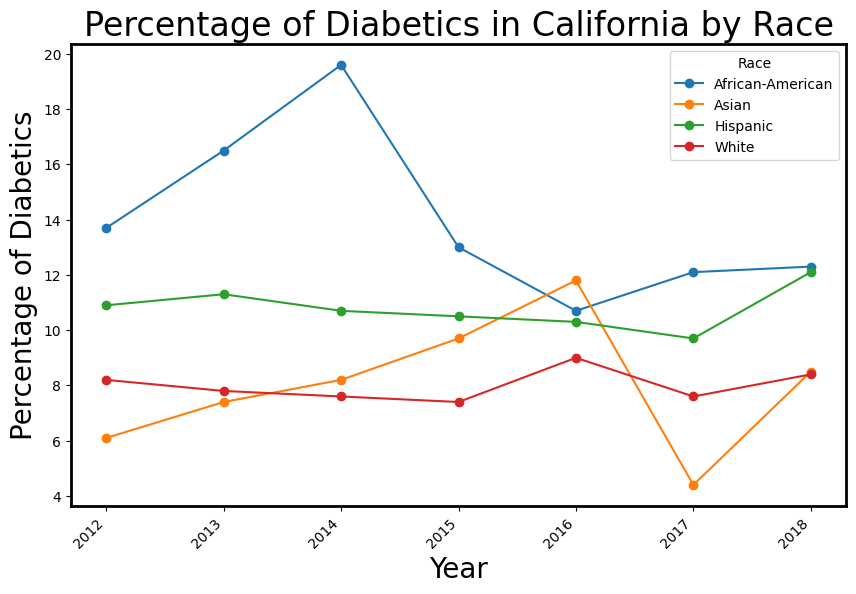

In [21]:
pivot_table.plot(kind= 'line', marker= 'o', figsize=(10,6))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage of Diabetics', fontsize=20)
plt.title('Percentage of Diabetics in California by Race', fontsize=24)
plt.legend(title='Race', loc='best')
plt.xticks(pivot_table.index, rotation=45, ha='right')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.show()

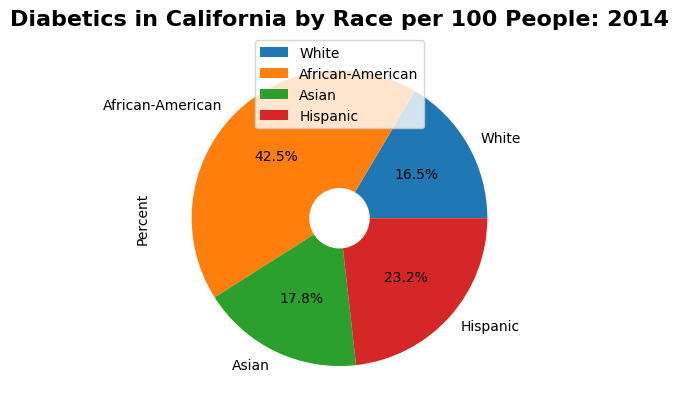

In [117]:
Race_DF_2014 = Race_DF.loc[Race_DF["Year"] == 2014] 
ax = Race_DF_2014.plot(y = "Percent", kind = "pie", legend = False, autopct = '%1.1f%%', labels=Race_DF_2014['Race'])
ax.set_title("Diabetics in California by Race per 100 People: 2014", fontsize=16, fontweight='bold')
ax.legend(Race_DF_2014['Race'], loc=9)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

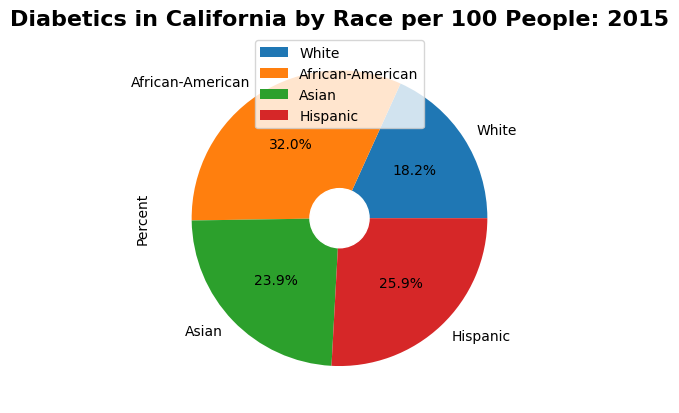

In [121]:
Race_DF_2015 = Race_DF.loc[Race_DF["Year"] == 2015] 
ax = Race_DF_2015.plot(y = "Percent", kind = "pie", legend = False, autopct = '%1.1f%%', labels=Race_DF_2015['Race'])
ax.set_title("Diabetics in California by Race per 100 People: 2015", fontsize=16, fontweight='bold')
ax.legend(Race_DF_2015['Race'], loc=9)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

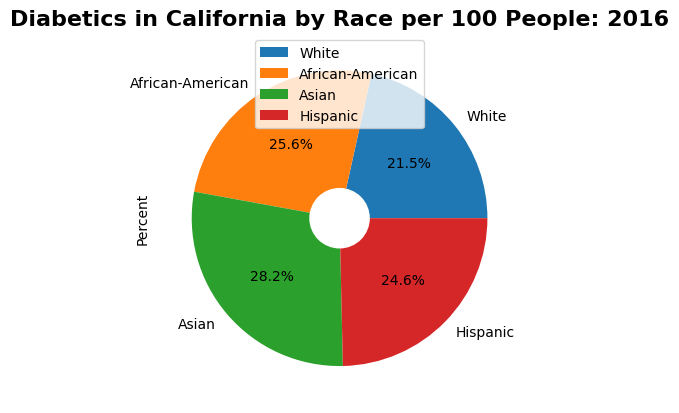

In [120]:
Race_DF_2016 = Race_DF.loc[Race_DF["Year"] == 2016] 
ax = Race_DF_2016.plot(y = "Percent", kind = "pie", legend = False, autopct = '%1.1f%%', labels=Race_DF_2016['Race'])
ax.set_title("Diabetics in California by Race per 100 People: 2016", fontsize=16, fontweight='bold')
ax.legend(Race_DF_2016['Race'], loc=9)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

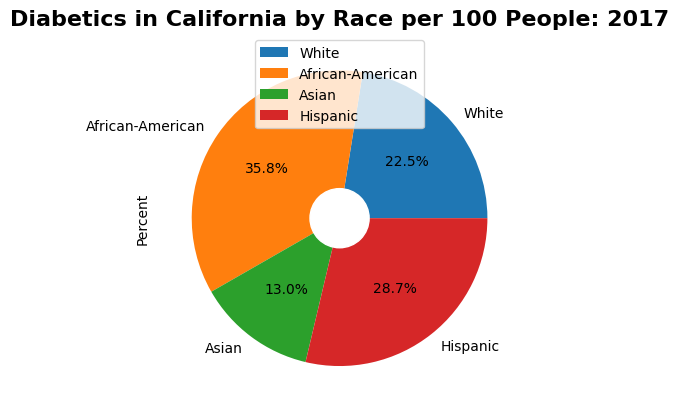

In [119]:
Race_DF_2017 = Race_DF.loc[Race_DF["Year"] == 2017] 
ax = Race_DF_2017.plot(y = "Percent", kind = "pie", legend = False, autopct = '%1.1f%%', labels=Race_DF_2017['Race'])
ax.set_title("Diabetics in California by Race per 100 People: 2017", fontsize=16, fontweight='bold')
ax.legend(Race_DF_2017['Race'], loc=9)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

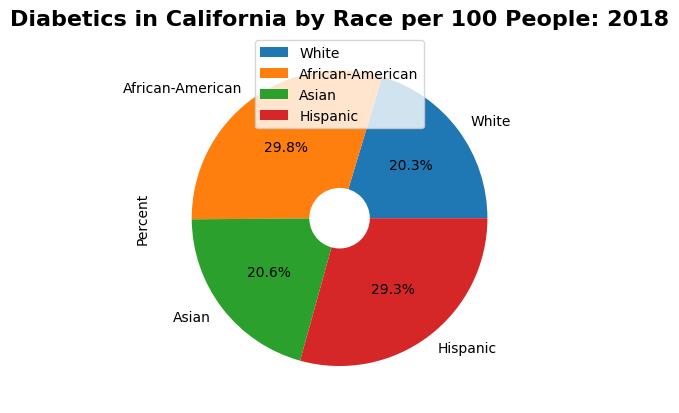

In [118]:
Race_DF_2018 = Race_DF.loc[Race_DF["Year"] == 2018] 
ax = Race_DF_2018.plot(y = "Percent", kind = "pie", legend = False, autopct = '%1.1f%%', labels=Race_DF_2018['Race'])
ax.set_title("Diabetics in California by Race per 100 People: 2018", fontsize=16, fontweight='bold')
ax.legend(Race_DF_2018['Race'], loc=9)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))